In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('raw_data3.csv',header=None)
df.head()
# df.size

,0
0,2.238215
1,0.199574
2,0.106171
3,2.253664
4,0.124181


In [3]:
window_size=21
ncols=30
guard=4
k=2
sigma=1
middle=window_size//2
ini_list=df.values.tolist()
lst = list(chain.from_iterable(ini_list))    # flatten the list
len(lst)

18000

sampling

In [4]:
thr_lst=[]
v0_avg=sum(lst[1+guard:middle+1])/(middle-guard)
v0_th=v0_avg+k*sigma
if lst[0]>=v0_th:
    thr_lst.append(1)
else:
    thr_lst.append(0)
#---------------------
sampled=[]
sampled.append(lst[0])

for i in range(len(lst)-window_size):
    window=lst[i:i+window_size]
#     print(len(window))
    temp=sum(window[:(middle-guard)])+sum(window[(middle+guard+1):])
    vn_avg=temp/(2*(middle-guard))
    v_th=vn_avg+k*sigma
#     print("threshold:  ",v_th)
#     print("value:  ",lst[i+middle])
    if (i+middle+1)%20==0:
        sampled.append(lst[i+middle])
        if lst[i+middle]>=v_th :
            thr_lst.append(1)
    #         print(1)
        else:
            thr_lst.append(0)
    #         print(0)
    
    
    

In [5]:
print(sampled)
print("----------")
print(thr_lst)
print("----------")
print(len(sampled),len(thr_lst))

[2.2382145725888916, -0.4658830110876377, -0.9335964665829068, -1.2715964751594384, 6.618097184179957, 9.220149296571789, 7.769316322362608, -0.2556498448962325, -2.273614533595119, 0.4512035475277306, -0.4152207530005198, 0.5876091692802884, -0.4257756930158083, -0.516198818351606, -0.21954136656494527, -3.2400000852140605, -1.2426945206138968, -0.4709722595488848, 1.8107305271587677, 0.9046290137505, 1.406918160197394, 1.1024155750393536, -0.9026699654567258, 1.2212637995511744, -1.2208480824604775, -0.9813551750933054, 8.649140133690821, 1.626962896230962, -0.584468096141673, -0.07031137274119564, 0.6424703675982525, 1.6850475741746402, 8.524375515461433, 1.4406643744253609, -1.7140714074656158, -1.1066679993239443, 0.7115632260573592, 0.048351885901676474, 9.192646341285856, -1.9797531332418143, 1.2981946598460183, -0.8091388034841249, 1.7686586884571855, -0.39843475195757133, -0.6326770730885336, -0.39911985929564575, -0.2831829560123589, -0.3133743710536893, 0.08451836316462502, 

In [6]:
# A = np.array(thr_lst,np.uint8)
A = np.array(thr_lst,np.float64)
B = np.reshape(A, (-1, ncols))

In [7]:
print(type(B))

<class 'numpy.ndarray'>


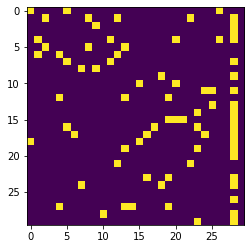

In [8]:
plt.imshow(B)
plt.show()

In [9]:
# import cv2
# # blur = cv2.blur(B,(5,5))

# kernel = np.ones((5,5),np.float32)/25
# dst = cv2.filter2D(B,-1,kernel)

# plt.imshow(dst)
# plt.show()

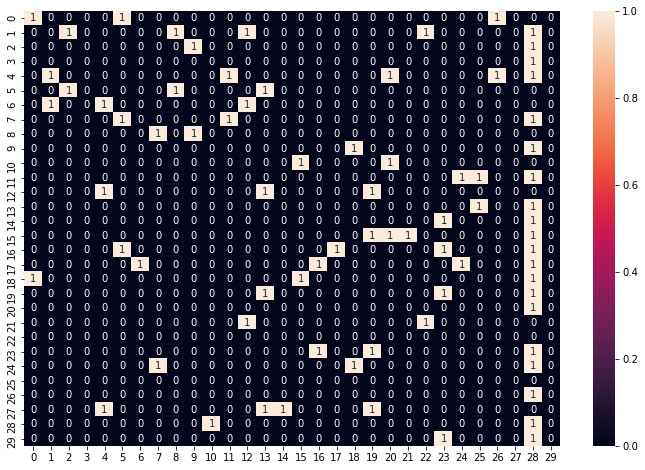

In [10]:
import seaborn as sns; #sns.set_theme()

plt.figure(figsize = (12,8))
ax = sns.heatmap(B,annot=True)

In [11]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
#         print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(imagePadded.shape[1]):
        # Exit Convolution
        if y > imagePadded.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(imagePadded.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > imagePadded.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
#                         xpad=x
#                         ypad=y
                        val= (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()  
                        if val<1:
                            image[x-padding+xKernShape//2, y-padding+yKernShape//2] =0
#                             imagePadded[xpad+xKernShape//2, ypad+yKernShape//2] =0
                        
                except:
                    break

    return image
#     return imagePadded

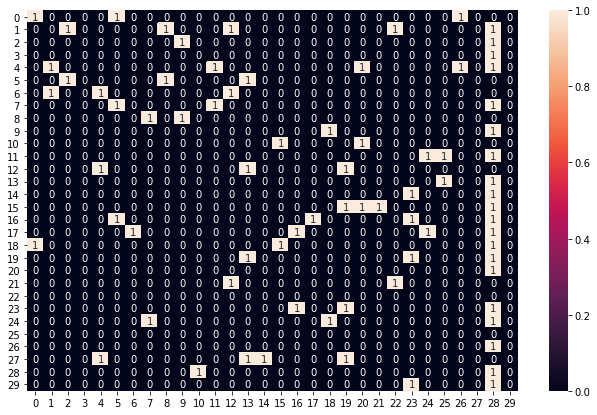

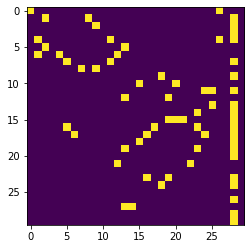

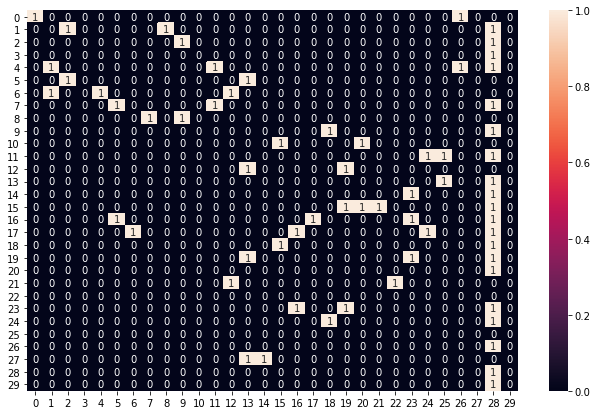

In [12]:
from scipy import signal
def noise_remove(img):
    
    kernel = np.array([[1,1,1,1,1],
                       [1,1,1,1,1],
                       [1,1,0,1,1],
                       [1,1,1,1,1],
                       [1,1,1,1,1]])
#     kernel=np.array([[1,1,1],
#                      [1,0,1],
#                      [1,1,1]])

    res=convolve2D(img,kernel,padding=2)
    return res

# a2 = sns.heatmap(noise_remove(B))  
# plt.imshow(B)
plt.figure(figsize = (11,7))
ax = sns.heatmap(B,annot=True)
plt.show()

B_new=noise_remove(B)
plt.imshow(B_new)
plt.show()
plt.figure(figsize = (11,7))
ax = sns.heatmap(B_new,annot=True)

In [13]:
type(B_new)

numpy.ndarray

In [14]:
# def range_angle(rangeslot):
    

target coloumns:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


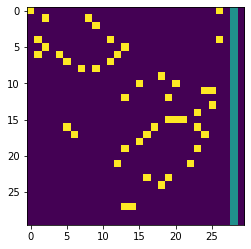

In [15]:
def detect_targets(img):
    target=[]
    xshape,yshape=img.shape
    for i in range(xshape):
        coloumn=img[0:yshape,i]
        if sum(coloumn)>=yshape*0.5:
            img[0:yshape,i]=0.5
            target.append(i)
            
    return img,coloumn
        
newimg,coloumn=detect_targets(B_new)
print("target coloumns: ",coloumn)

plt.imshow(newimg)
plt.show()


In [16]:
def distance(x1,y1,x2,y2):
    return ((y2-y1)**2 +(x2-x1)**2)**0.5
distance(1,1,2,2)

1.4142135623730951

705


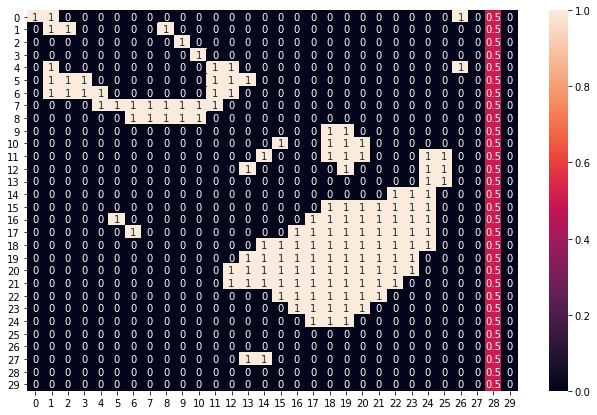

In [17]:
import cv2
from bresenham import bresenham

def fillgaps(img):
    count=0
    xshape,yshape=img.shape
    for i in range(yshape):
        for j in range(xshape):
            
            for k in range(yshape):
                for l in range(xshape):
                    
                    if 2<=distance(i,j,k,l)<=2*math.sqrt(2) and img[i,j]==1 and img[k,l]==1:
#                         print("Dist: ",distance(i,j,k,l))
                        count+=1
                        points=list(bresenham(i, j, k, l))
                        for m in points:
                            
                            xm,ym=m
                            img[xm,ym]=1

                        
                        
    print(count)
    return img

newimg2=fillgaps(newimg)
# plt.imshow(newimg2)
# plt.show()
plt.figure(figsize = (11,7))
ax = sns.heatmap(newimg2,annot=True)


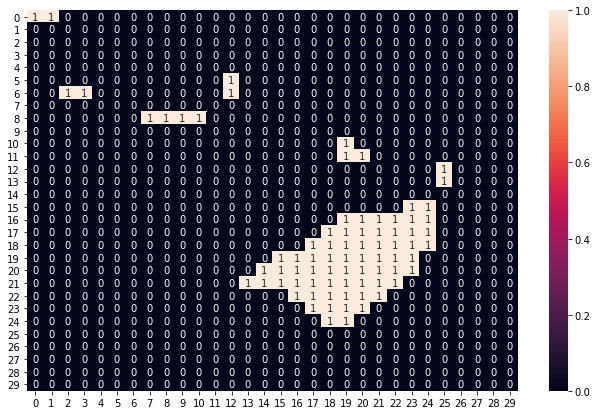

In [18]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(newimg2.copy(),kernel,iterations = 1)

plt.figure(figsize = (11,7))
ax = sns.heatmap(erosion,annot=True)

In [19]:
8**0.5

2.8284271247461903

In [20]:
from bresenham import bresenham
list(bresenham(-1, -4, 3, 2))

[(-1, -4), (0, -3), (0, -2), (1, -1), (2, 0), (2, 1), (3, 2)]